In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, auc

from sklearn.model_selection import RandomizedSearchCV

sns.set_style('darkgrid')
%matplotlib inline

# Import Data (removed outliers)

In [2]:
data = pd.read_csv('no_outliers_data.csv')
data

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,...,verifyhousing,verifyhousingamount,verifyincometype,verifymobile,verifyphone,verifyssn,verifytoken,webview,welcomebankverification,yournetwork
0,235136,2012-12-27 02:14:51,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,333588,2012-12-02 01:16:00,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,254414,2013-03-19 19:19:09,1,19,23,"Splash,Cycle,Loan",3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,2013-07-05 16:08:46,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,...,0,0,0,0,1,1,0,0,0,0
4,51549,2013-02-26 18:50:48,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,...,0,0,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40426,222774,2013-05-09 13:46:17,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,...,0,0,0,0,1,1,0,0,0,0
40427,169179,2013-04-09 00:05:17,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,...,0,0,0,0,0,0,0,0,0,0
40428,302367,2013-02-20 22:41:51,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,...,0,0,0,0,1,0,1,0,0,0
40429,324905,2013-04-28 12:33:04,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,...,0,0,0,0,1,1,1,0,0,0


# Data without outliers - No Standardize - No SMOTE

In [3]:
features = data.drop(['user', 'first_open', 'screen_list', 'enrolled_date', 'fo_to_enrolled'],axis=1)
features

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,about,accountview,...,verifyhousing,verifyhousingamount,verifyincometype,verifymobile,verifyphone,verifyssn,verifytoken,webview,welcomebankverification,yournetwork
0,3,2,23,15,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,6,1,24,13,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,1,19,23,3,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,16,28,40,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,1,18,31,32,0,0,1,1,0,0,...,0,0,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40426,3,13,32,13,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
40427,1,0,35,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40428,2,22,39,25,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
40429,6,12,27,26,0,0,1,0,0,0,...,0,0,0,0,1,1,1,0,0,0


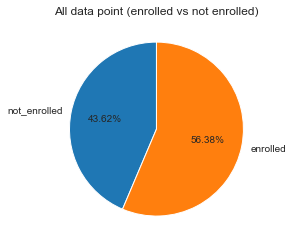

In [4]:
sizes_feat = [len(features[features['enrolled']==0]), len(features[features['enrolled']==1])]
labels = ['not_enrolled', 'enrolled']

plt.title('All data point (enrolled vs not enrolled)')
plt.pie(sizes_feat, labels=labels, autopct='%2.2f%%', startangle=90)
plt.show()

## Train Test Split

In [5]:
X = features.drop('enrolled',axis=1)
y = features['enrolled']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [7]:
y_train.value_counts()

1    15936
0    12365
Name: enrolled, dtype: int64

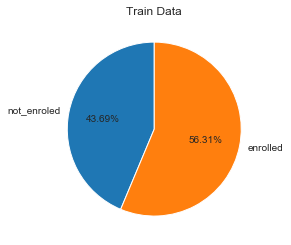

In [8]:
sizes = [len(y_train[y_train==0]), len(y_train[y_train==1])]
labels = ['not_enroled', 'enrolled']


plt.title('Train Data')
plt.pie(sizes, labels=labels, autopct='%2.2f%%', startangle=90)

plt.show()

Train dataset is already balanced. No need to SMOTE Oversampling

## Modelling No Standardize - No SMOTE

### Logistic Regression

In [9]:
logreg = LogisticRegression()
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
logreg.fit(X_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
pred_logreg = logreg.predict(X_test)
proba_logreg = logreg.predict_proba(X_test)

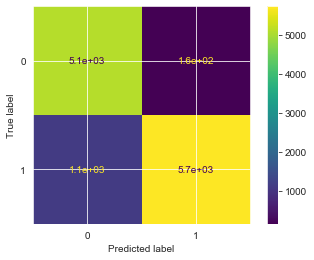

In [12]:
print(plot_confusion_matrix(logreg, X_test, y_test))

In [13]:
print(confusion_matrix(y_test, pred_logreg))

[[5115  157]
 [1127 5731]]


In [14]:
print(classification_report(y_test, pred_logreg))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5272
           1       0.97      0.84      0.90      6858

    accuracy                           0.89     12130
   macro avg       0.90      0.90      0.89     12130
weighted avg       0.91      0.89      0.89     12130



In [15]:
cr_logreg = classification_report(y_test,pred_logreg,output_dict=True)
cr_logreg = pd.DataFrame(cr_logreg).T
cr_logreg

,precision,recall,f1-score,support
0,0.819449,0.970220,0.888484,5272.000000
1,0.973336,0.835666,0.899263,6858.000000
accuracy,0.894147,0.894147,0.894147,0.894147
macro avg,0.896392,0.902943,0.893873,12130.000000
weighted avg,0.906453,0.894147,0.894578,12130.000000


In [16]:
print(f'F1 Score : {f1_score(y_test, pred_logreg)}')
print(f'Precision Score : {precision_score(y_test, pred_logreg)}')
print(f'Recall Score : {recall_score(y_test, pred_logreg)}')

F1 Score : 0.8992625137297976
Precision Score : 0.9733355978260869
Recall Score : 0.8356663750364538


### KNN
Not using KNN algortihm, coz KNN need to stardardize / scaling the dataset first before execute the algorithm

### Decision Tree Classifier

In [17]:
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
pred_dt = dtree.predict(X_test)
proba_dt = dtree.predict_proba(X_test)

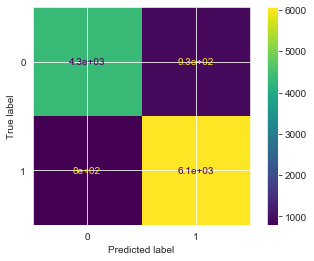

In [20]:
print(plot_confusion_matrix(dtree, X_test, y_test))

In [21]:
print(confusion_matrix(y_test, pred_dt))

[[4344  928]
 [ 795 6063]]


In [22]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      5272
           1       0.87      0.88      0.88      6858

    accuracy                           0.86     12130
   macro avg       0.86      0.85      0.86     12130
weighted avg       0.86      0.86      0.86     12130



In [23]:
print(f'F1 Score : {f1_score(y_test, pred_dt)}')
print(f'Precision Score : {precision_score(y_test, pred_dt)}')
print(f'Recall Score : {recall_score(y_test, pred_dt)}')

F1 Score : 0.8755866849592029
Precision Score : 0.8672579030181662
Recall Score : 0.884076990376203


### Random Forest Classifier

In [24]:
rfc = RandomForestClassifier()
rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
pred_rfc = rfc.predict(X_test)
proba_rfc = rfc.predict_proba(X_test)

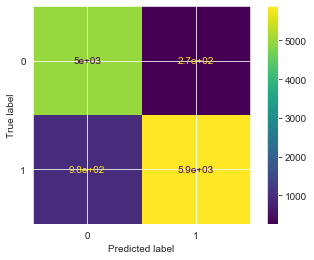

In [27]:
print(plot_confusion_matrix(rfc, X_test, y_test))

In [28]:
print(confusion_matrix(y_test, pred_rfc))

[[5002  270]
 [ 980 5878]]


In [29]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5272
           1       0.96      0.86      0.90      6858

    accuracy                           0.90     12130
   macro avg       0.90      0.90      0.90     12130
weighted avg       0.90      0.90      0.90     12130



In [30]:
print(f'F1 Score : {f1_score(y_test, pred_rfc)}')
print(f'Precision Score : {precision_score(y_test, pred_rfc)}')
print(f'Recall Score : {recall_score(y_test, pred_rfc)}')

F1 Score : 0.9038905120713517
Precision Score : 0.9560832791151594
Recall Score : 0.8571011956838729


### Ada Boost - dtree

In [31]:
ada_dt = AdaBoostClassifier(base_estimator=dtree)
ada_dt

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [32]:
ada_dt.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [33]:
pred_ada_dt = ada_dt.predict(X_test)
proba_ada_dt = ada_dt.predict_proba(X_test)

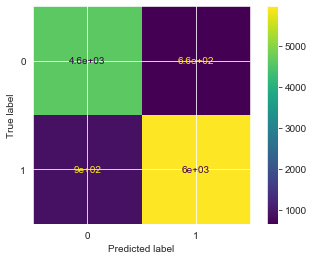

In [34]:
print(plot_confusion_matrix(ada_dt, X_test, y_test))

In [35]:
print(confusion_matrix(y_test, pred_ada_dt))

[[4611  661]
 [ 903 5955]]


In [36]:
print(classification_report(y_test, pred_ada_dt))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      5272
           1       0.90      0.87      0.88      6858

    accuracy                           0.87     12130
   macro avg       0.87      0.87      0.87     12130
weighted avg       0.87      0.87      0.87     12130



In [37]:
print(f'F1 Score : {f1_score(y_test, pred_ada_dt)}')
print(f'Precision Score : {precision_score(y_test, pred_ada_dt)}')
print(f'Recall Score : {recall_score(y_test, pred_ada_dt)}')

F1 Score : 0.8839245955172926
Precision Score : 0.9000906892382105
Recall Score : 0.86832895888014


### Gradient Boosting Classifier

In [38]:
gradient = GradientBoostingClassifier()
gradient

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [39]:
gradient.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [40]:
pred_gradient = gradient.predict(X_test)
proba_gradient = gradient.predict_proba(X_test)

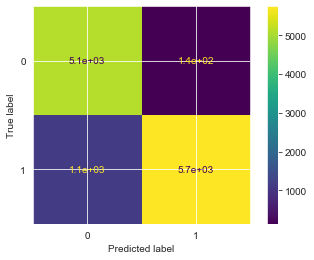

In [41]:
print(plot_confusion_matrix(gradient, X_test, y_test))

In [42]:
print(confusion_matrix(y_test, pred_gradient))

[[5132  140]
 [1110 5748]]


In [43]:
print(classification_report(y_test, pred_gradient))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5272
           1       0.98      0.84      0.90      6858

    accuracy                           0.90     12130
   macro avg       0.90      0.91      0.90     12130
weighted avg       0.91      0.90      0.90     12130



In [44]:
print(f'F1 Score : {f1_score(y_test, pred_gradient)}')
print(f'Precision Score : {precision_score(y_test, pred_gradient)}')
print(f'Recall Score : {recall_score(y_test, pred_gradient)}')

F1 Score : 0.9019300172603171
Precision Score : 0.9762228260869565
Recall Score : 0.8381452318460193


## Eval Metrics (No Standardize - No SMOTE)

In [45]:
pred_model = [pred_logreg, pred_dt, pred_rfc, pred_ada_dt, pred_gradient]
f1 = []
prec = []
rec = []

for mod in pred_model:
    f1.append(round(f1_score(y_test, mod)*100,2))
    prec.append(round(precision_score(y_test, mod)*100,2))
    rec.append(round(recall_score(y_test, mod)*100,2))
    
print(f1)
print(prec)
print(rec)

[89.93, 87.56, 90.39, 88.39, 90.19]
[97.33, 86.73, 95.61, 90.01, 97.62]
[83.57, 88.41, 85.71, 86.83, 83.81]


In [46]:
mtrc_summary = pd.DataFrame([f1,prec,rec], index=['f1_score', 'precision_score', 'recall_score'],
                           columns=['logistic_reg', 'dtree', 'rfc', 'ada_boost_dt', 'gradient_boost'])
mtrc_summary = mtrc_summary.T
mtrc_summary = mtrc_summary.reset_index()
mtrc_summary.rename(columns={'index':'model'}, inplace=True)
mtrc_summary

,model,f1_score,precision_score,recall_score
0,logistic_reg,89.93,97.33,83.57
1,dtree,87.56,86.73,88.41
2,rfc,90.39,95.61,85.71
3,ada_boost_dt,88.39,90.01,86.83
4,gradient_boost,90.19,97.62,83.81


In [47]:
mtrc_summary.sort_values('f1_score',ascending=False)

,model,f1_score,precision_score,recall_score
2,rfc,90.39,95.61,85.71
4,gradient_boost,90.19,97.62,83.81
0,logistic_reg,89.93,97.33,83.57
3,ada_boost_dt,88.39,90.01,86.83
1,dtree,87.56,86.73,88.41


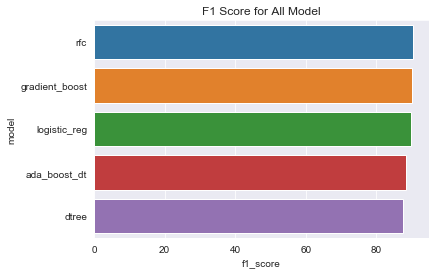

In [48]:
plt.title('F1 Score for All Model')
sns.barplot('f1_score', 'model', data=mtrc_summary.sort_values('f1_score',ascending=False))
plt.show()

#### 3 Best Model according to F1 Score
1. Random Forest Classifier
2. Logistic Regression
3. Gradient Boost Classifier

## ROC AUC - No Standardize - No SMOTE

In [49]:
prob_rfc = proba_rfc[:,1]
fpr_rfc, tpr_rfc, threshold_rfc = roc_curve(y_test, prob_rfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

prob_gradient = proba_gradient[:,1]
fpr_gradient, tpr_gradient, threshold_gradient = roc_curve(y_test, prob_gradient)
roc_auc_gradient = auc(fpr_gradient, tpr_gradient)

prob_logreg = proba_logreg[:,1]
fpr_logreg, tpr_logreg, threshold_logreg = roc_curve(y_test, prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

In [50]:
print('Random Forest', round(auc(fpr_rfc, tpr_rfc),2))
print('Logistic Regression', round(auc(fpr_logreg, tpr_logreg),2))
print('Gradient Boosting', round(auc(fpr_gradient, tpr_gradient),2))

Random Forest 0.96
Logistic Regression 0.95
Gradient Boosting 0.96


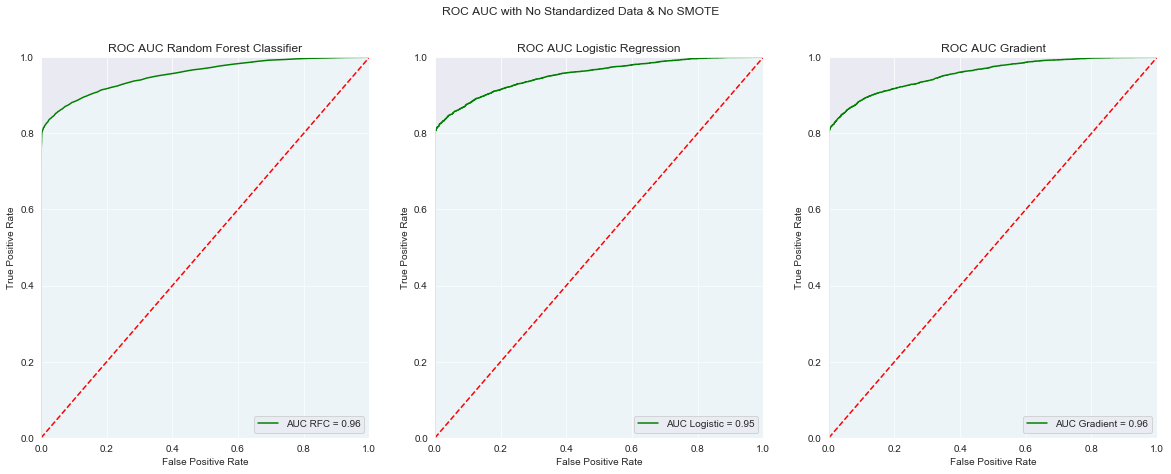

In [51]:
plt.figure(figsize=(20,7))
plt.suptitle('ROC AUC with No Standardized Data & No SMOTE')

plt.subplot(131)
plt.title('ROC AUC Random Forest Classifier')
plt.plot(fpr_rfc, tpr_rfc, 'green', label='AUC RFC = {}'.format(round(roc_auc_rfc,2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rfc,tpr_rfc, 0, facecolor='azure', alpha=0.5)
plt.legend(loc = 'lower right')

plt.subplot(132)
plt.title('ROC AUC Logistic Regression')
plt.plot(fpr_logreg, tpr_logreg, 'green', label='AUC Logistic = {}'.format(round(roc_auc_logreg,2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_logreg,tpr_logreg, 0, facecolor='azure', alpha=0.5)
plt.legend(loc = 'lower right')

plt.subplot(133)
plt.title('ROC AUC Gradient')
plt.plot(fpr_gradient, tpr_gradient, 'green', label='AUC Gradient = {}'.format(round(roc_auc_gradient,2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_gradient,tpr_gradient, 0, facecolor='azure', alpha=0.5)
plt.legend(loc = 'lower right')

plt.show()

# Hyper Parameter Tuning

### Random Forest Classifier - Tuning

In [52]:
rfc_cv = RandomForestClassifier()
rfc_cv

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
param_rfc_cv = {
    'bootstrap': [True, False],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [int(x) for x in np.arange(10,120,20)],
    'min_samples_split' : [int(x) for x in np.arange(2,32,2)],
    'n_estimators' : [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
}

rfc_cv_random = RandomizedSearchCV(estimator= rfc_cv,
                              param_distributions= param_rfc_cv,
                              n_iter=10, cv=5, n_jobs=-1, scoring='f1')

In [54]:
rfc_cv_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [55]:
rfc_cv_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 14,
 'max_depth': 50,
 'criterion': 'entropy',
 'bootstrap': False}

In [56]:
rfc_cv_random.best_estimator_.score(X_train, y_train)

0.9697890533903396

In [57]:
rfc_cv_rand = rfc_cv_random.best_estimator_
rfc_cv_rand

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=14,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
pred_rfc_cv = rfc_cv_rand.predict(X_test)
proba_rfc_cv = rfc_cv_rand.predict_proba(X_test)

In [59]:
print('Tuning')
print(confusion_matrix(y_test, pred_rfc_cv))
print()
print('No Tuning')
print(confusion_matrix(y_test, pred_rfc))

Tuning
[[5033  239]
 [ 995 5863]]

No Tuning
[[5002  270]
 [ 980 5878]]


In [60]:
print('Tuning')
print(classification_report(y_test, pred_rfc_cv))
print()
print('No Tuning')
print(classification_report(y_test, pred_rfc))

Tuning
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5272
           1       0.96      0.85      0.90      6858

    accuracy                           0.90     12130
   macro avg       0.90      0.90      0.90     12130
weighted avg       0.91      0.90      0.90     12130


No Tuning
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5272
           1       0.96      0.86      0.90      6858

    accuracy                           0.90     12130
   macro avg       0.90      0.90      0.90     12130
weighted avg       0.90      0.90      0.90     12130

